In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
from tkinter.tix import COLUMN


df = pd.read_csv('./Shiok Ah! Accelerated Introduction to Entrepreneurship (Responses) - Form responses 1.csv')

# Rename columns 

df.rename({'How old are you?': 'Age','What is your height? (cm)': 'Height','What is your weight? (kg)':'Weight'},inplace=True,axis=1)

df.head()


,Timestamp,Age,Height,Weight,What are your dietary requirement?,Do you have any allergies?,Are you interested in trying new food?,Chicken Rice,Yong Tau Foo,Hokkien Mee,...,French Fries,Fried Chicken,Burgers,Pasta,Chawanmushi,Sashimi,Sushi,Ramen,Miso Soup,Korean BBQ
0,13/09/2022 22:52:36,17.0,165.0,73.0,None,None,Yes,Like,Like,Like,...,Like,Like,Like,Like,Like,Like,Like,Like,Like,Like
1,13/09/2022 23:16:19,17.0,156.0,53.0,None,None,Yes,Like,Like,Like,...,Like,Like,Like,Like,Like,Like,Like,Like,Like,Like
2,13/09/2022 23:18:46,18.0,166.0,47.0,None,None,Yes,Like,Dislike,Like,...,Like,Like,Like,Like,Like,Dislike,Like,Like,Dislike,Dislike
3,13/09/2022 23:26:41,18.0,153.0,52.0,None,None,Yes,Dislike,Dislike,Like,...,Like,Like,Like,Like,Like,Dislike,Like,Like,Like,Like
4,13/09/2022 23:27:02,18.0,154.0,45.0,None,None,Yes,Like,Dislike,Dislike,...,Like,Like,Like,Like,Like,Dislike,Like,Like,Like,Like


<AxesSubplot:ylabel='Frequency'>

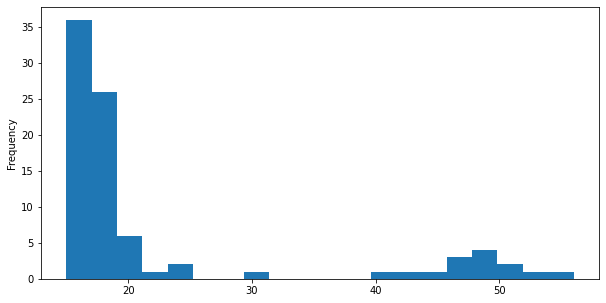

In [22]:
# Histogram of Age 
df["Age"].plot(kind='hist', bins=20, figsize=(10,5))

In [5]:
# Create age group column, 23 and below is considered young, 23 and above is considered old
df['Age_group'] = np.where(df['Age'] <= 23, 'Young', 'Old')
df['Age_group'].value_counts()

Young    69
Old      17
Name: Age_group, dtype: int64

In [6]:
# Export new dataframe to csv
df.to_csv('new_df.csv', index=False)


In [11]:
# Drop usless features 
df_clean = df.copy()
df_clean.drop(['Timestamp','Age','Height','Weight','What are your dietary requirement?','Do you have any allergies?','Are you interested in trying new food?','Age_group'],axis=1,inplace=True)

df_clean

,Chicken Rice,Yong Tau Foo,Hokkien Mee,Char Kway Teow,Laksa,Kaya Toast,Chilli Crab,Dim Sum,Nasi Lemak,Ayam Penyet,...,Fried Chicken,Burgers,Pasta,Chawanmushi,Sashimi,Sushi,Ramen,Miso Soup,Korean BBQ,userId
0,Like,Like,Like,Dislike,Like,Like,Like,Like,Like,Like,...,Like,Like,Like,Like,Like,Like,Like,Like,Like,0
1,Like,Like,Like,Like,Dislike,Like,Dislike,Like,Dislike,Dislike,...,Like,Like,Like,Like,Like,Like,Like,Like,Like,1
2,Like,Dislike,Like,Like,Dislike,Like,Dislike,Dislike,Like,Like,...,Like,Like,Like,Like,Dislike,Like,Like,Dislike,Dislike,2
3,Dislike,Dislike,Like,Dislike,Like,Like,Dislike,Like,Dislike,Dislike,...,Like,Like,Like,Like,Dislike,Like,Like,Like,Like,3
4,Like,Dislike,Dislike,Dislike,Dislike,Like,Dislike,Dislike,Dislike,Like,...,Like,Like,Like,Like,Dislike,Like,Like,Like,Like,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Like,Dislike,Like,Like,Like,Like,Like,Like,Like,Like,...,Like,Like,Like,Dislike,Like,Like,Like,Like,Like,81
82,Like,Dislike,Like,Like,Like,Like,Like,Like,Like,Like,...,Like,Like,Like,Like,Dislike,Like,Like,Like,Like,82
83,Like,Like,Like,Dislike,Dislike,Like,Like,Like,Like,Like,...,Dislike,Dislike,Like,Dislike,Like,Like,Like,Like,Like,83
84,Like,Like,Like,Like,Like,Like,Like,Like,Like,Like,...,Like,Like,Like,Like,Like,Like,Like,Like,Like,84


In [10]:
# Get column names
unique_dishes = df_clean.columns
unique_dishes

30

In [12]:
# Create new column for userId based on row
df_clean['userId'] = df_clean.index
df_clean.head()

,Chicken Rice,Yong Tau Foo,Hokkien Mee,Char Kway Teow,Laksa,Kaya Toast,Chilli Crab,Dim Sum,Nasi Lemak,Ayam Penyet,...,Fried Chicken,Burgers,Pasta,Chawanmushi,Sashimi,Sushi,Ramen,Miso Soup,Korean BBQ,userId
0,Like,Like,Like,Dislike,Like,Like,Like,Like,Like,Like,...,Like,Like,Like,Like,Like,Like,Like,Like,Like,0
1,Like,Like,Like,Like,Dislike,Like,Dislike,Like,Dislike,Dislike,...,Like,Like,Like,Like,Like,Like,Like,Like,Like,1
2,Like,Dislike,Like,Like,Dislike,Like,Dislike,Dislike,Like,Like,...,Like,Like,Like,Like,Dislike,Like,Like,Dislike,Dislike,2
3,Dislike,Dislike,Like,Dislike,Like,Like,Dislike,Like,Dislike,Dislike,...,Like,Like,Like,Like,Dislike,Like,Like,Like,Like,3
4,Like,Dislike,Dislike,Dislike,Dislike,Like,Dislike,Dislike,Dislike,Like,...,Like,Like,Like,Like,Dislike,Like,Like,Like,Like,4


In [31]:
df_melted = df_clean.melt(id_vars=['userId'], value_vars=unique_dishes)
# Extrace rows only liked dishes
df_melted = df_melted[df_melted['value'] == 'Like']

df_melted

,userId,variable,value
0,0,Chicken Rice,Like
1,1,Chicken Rice,Like
2,2,Chicken Rice,Like
4,4,Chicken Rice,Like
5,5,Chicken Rice,Like
...,...,...,...
2575,81,Korean BBQ,Like
2576,82,Korean BBQ,Like
2577,83,Korean BBQ,Like
2578,84,Korean BBQ,Like


In [32]:
# Extrace rows only liked dishes
df_melted = df_melted[df_melted['value'] == 'Like']

df_melted

,userId,variable,value
0,0,Chicken Rice,Like
1,1,Chicken Rice,Like
2,2,Chicken Rice,Like
4,4,Chicken Rice,Like
5,5,Chicken Rice,Like
...,...,...,...
2575,81,Korean BBQ,Like
2576,82,Korean BBQ,Like
2577,83,Korean BBQ,Like
2578,84,Korean BBQ,Like


In [33]:
# Drop value column
df_melted.drop('value',axis=1,inplace=True)
df_melted

,userId,variable
0,0,Chicken Rice
1,1,Chicken Rice
2,2,Chicken Rice
4,4,Chicken Rice
5,5,Chicken Rice
...,...,...
2575,81,Korean BBQ
2576,82,Korean BBQ
2577,83,Korean BBQ
2578,84,Korean BBQ


In [35]:
len(df_features)

2087

In [51]:
# Create a dict from df_melted df to map each row to dict 
df_dict = df_melted.to_dict('records')

df_dict

[{'userId': 0, 'variable': 'Chicken Rice'},
 {'userId': 1, 'variable': 'Chicken Rice'},
 {'userId': 2, 'variable': 'Chicken Rice'},
 {'userId': 4, 'variable': 'Chicken Rice'},
 {'userId': 5, 'variable': 'Chicken Rice'},
 {'userId': 6, 'variable': 'Chicken Rice'},
 {'userId': 7, 'variable': 'Chicken Rice'},
 {'userId': 8, 'variable': 'Chicken Rice'},
 {'userId': 9, 'variable': 'Chicken Rice'},
 {'userId': 10, 'variable': 'Chicken Rice'},
 {'userId': 11, 'variable': 'Chicken Rice'},
 {'userId': 12, 'variable': 'Chicken Rice'},
 {'userId': 13, 'variable': 'Chicken Rice'},
 {'userId': 14, 'variable': 'Chicken Rice'},
 {'userId': 15, 'variable': 'Chicken Rice'},
 {'userId': 16, 'variable': 'Chicken Rice'},
 {'userId': 17, 'variable': 'Chicken Rice'},
 {'userId': 19, 'variable': 'Chicken Rice'},
 {'userId': 20, 'variable': 'Chicken Rice'},
 {'userId': 21, 'variable': 'Chicken Rice'},
 {'userId': 22, 'variable': 'Chicken Rice'},
 {'userId': 23, 'variable': 'Chicken Rice'},
 {'userId': 24, 'va

In [46]:
# convert df_dict to dict dtype
df_dict = dict(df_dict)
df_dict

{'userId': 'variable'}

In [ ]:
pt_tensor_from_list = torch.FloatTensor(py_list)


# Testing Conversion of TensorflowLite from SavedModel

In [2]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('./Saved_model_testing') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

NameError: name 'tf' is not defined